In [11]:
import numpy as np
import os
import platform

from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector


In [12]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 7  # Number of files to process at once
else:
    raise OSError('Unknown platform')

In [13]:
run_name = 'drift_scan_11-13-24'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'drift_200'
# sub_run_name = 'drift_800'

det_single = 'scintillator_top'

# file_nums = list(range(0, 50))
file_nums = 'all'

# connector_channels = {4: np.array([21])}
connector_channels = {4: np.array([20, 21])}
# connector_channels = None

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'

try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [14]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [15]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Connectors: {det.feu_connectors}')
print(f'HV: {det.hv}')
# det.load_dream_data(data_dir, ped_dir, 10, file_nums, chunk_size, save_waveforms=True, waveform_fit_func='parabola_vectorized', 
#                     connector_channels=connector_channels, hist_raw_amps=True)
det.load_dream_data(data_dir, ped_dir, 10, file_nums, chunk_size, save_waveforms=True, waveform_fit_func='waveform_func', 
                    connector_channels=connector_channels, hist_raw_amps=True)
print(f'Hits shape: {det.dream_data.hits.shape}')

Error: Detector type scintillator not found in det map types.
FEU Num: 3
FEU Connectors: [4]
HV: {}
Reading in data...


100%|██████████| 7/7 [00:01<00:00,  3.57it/s]

data_i shape: (2187, 2, 32)
data_raw_i shape: (2187, 64, 32)
data_raw_i shape: (64, 69984)
data_raw_i[0:, 0].shape: (64,)
data_i shape: (2159, 2, 32)
data_raw_i shape: (2159, 64, 32)
data_raw_i shape: (64, 69088)
data_raw_i[0:, 0].shape: (64,)
data_i shape: (2140, 2, 32)
data_raw_i shape: (2140, 64, 32)
data_raw_i shape: (64, 68480)
data_raw_i[0:, 0].shape: (64,)
data_i shape: (2234, 2, 32)
data_raw_i shape: (2234, 64, 32)
data_raw_i shape: (64, 71488)
data_raw_i[0:, 0].shape: (64,)
data_i shape: (2207, 2, 32)
data_raw_i shape: (2207, 64, 32)
data_raw_i shape: (64, 70624)
data_raw_i[0:, 0].shape: (64,)
data_i shape: (2147, 2, 32)
data_raw_i shape: (2147, 64, 32)
data_raw_i shape: (64, 68704)
data_raw_i[0:, 0].shape: (64,)
data_i shape: (2146, 2, 32)
data_raw_i shape: (2146, 64, 32)
data_raw_i shape: (64, 68672)
data_raw_i[0:, 0].shape: (64,)


Read in data shape: (15220, 2, 32)
Getting amplitudes...


100%|██████████| 7/7 [03:58<00:00, 34.13s/it] 


Fitting time: 239.0456027984619 s
Processed chunk 1/2


100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


data_i shape: (769, 2, 32)
data_raw_i shape: (769, 64, 32)
data_raw_i shape: (64, 24608)
data_raw_i[0:, 0].shape: (64,)
Read in data shape: (769, 2, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:09<00:00,  1.29s/it]

Fitting time: 9.123832702636719 s
Processed chunk 2/2
Getting hits...
Hits shape: (15989, 2)


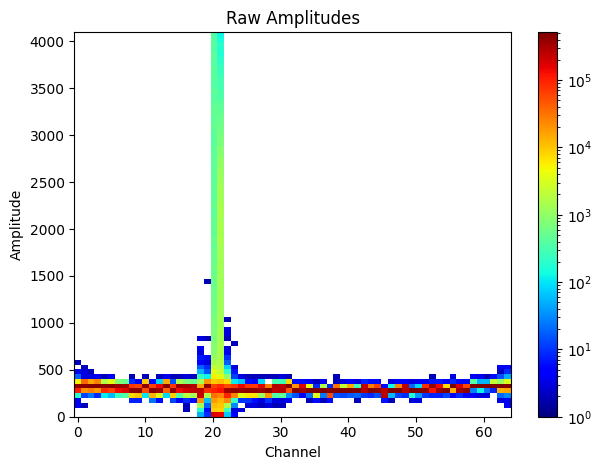

In [16]:
det.dream_data.plot_raw_amps_2d_hist()

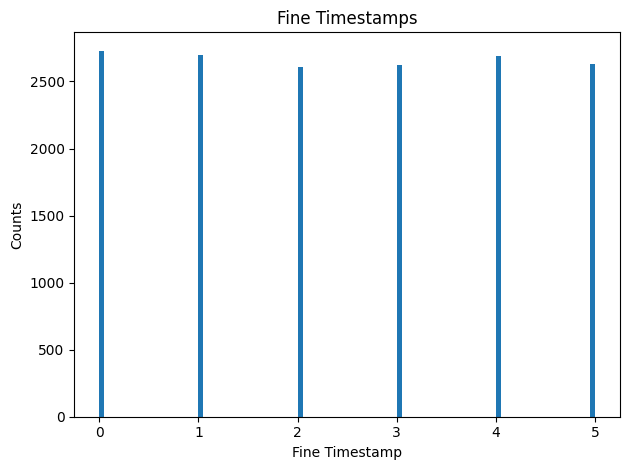

In [17]:
det.dream_data.plot_fine_timestamp_hist()
det.dream_data.correct_for_fine_timestamps()

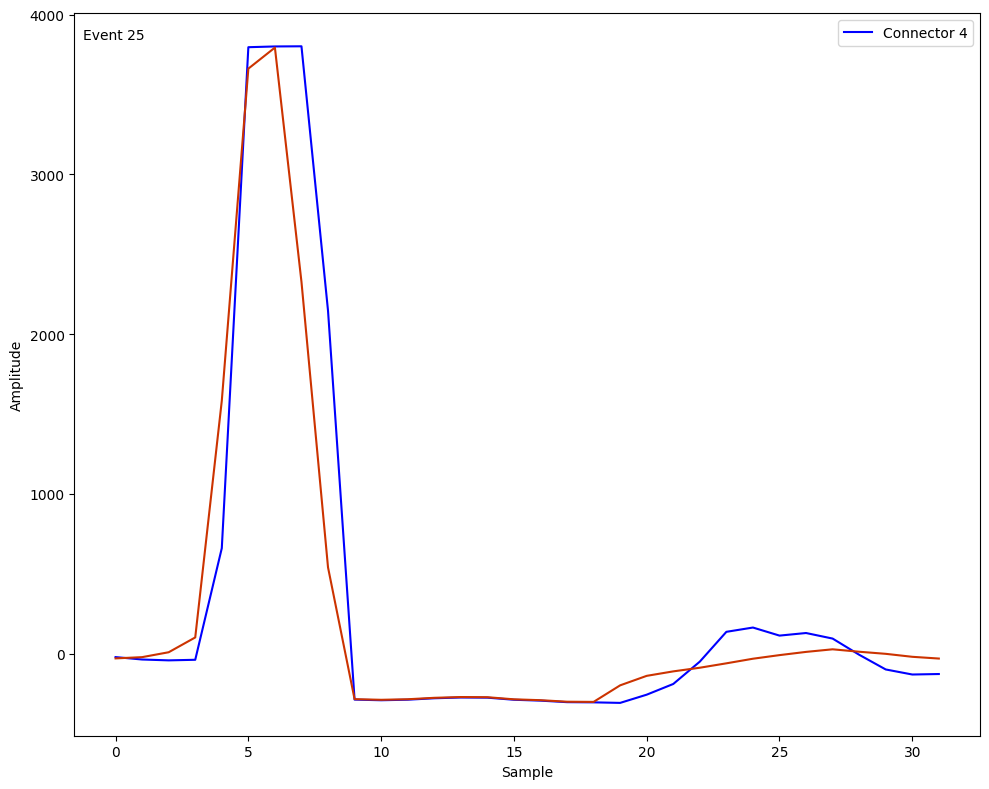

In [18]:
det.dream_data.plot_waveforms(25)

(np.float64(7.099280820597169), np.float64(0.214581104921106))

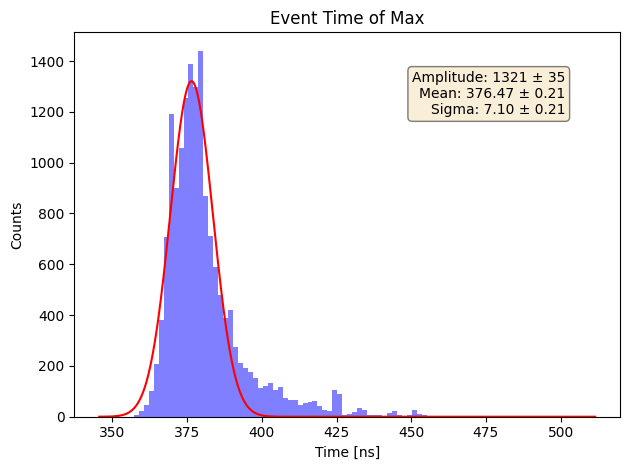

In [19]:
det.dream_data.plot_event_time_maxes(channel=0, min_amp=None, plot=True)

(np.float64(5.0847329316935586), np.float64(0.01939292722415454))

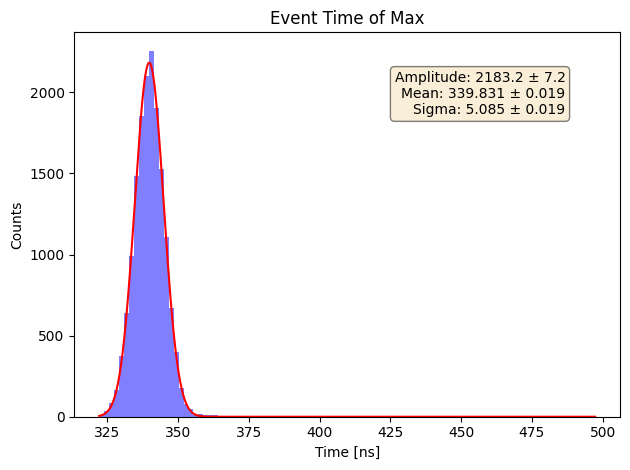

In [20]:
det.dream_data.plot_event_time_maxes(channel=1, min_amp=None, plot=True)